# Introduction - Exploratory Analysis

In this notebook, we will conduct an analysis of the data previously prepared in the path: `data/interim/hockey_teams.json`. This file, being partially processed, is easily accessible for import and ready for more detailed analytical examination.

This part of the workshop will focus on utilizing `pandas` and `matplotlib`, which were discussed during the course. The main objective is to familiarize ourselves with the dataset we are working on. Through a series of exercises:  
- we will get to know the structure of the data,  
- we will conduct elementary data exploration (EDA).

## Column Description

Below is a brief description of each column in our dataset:

- **Team Name**: The name of the team participating in the match.
- **Year**: The year in which the season takes place.
- **Wins**: The number of matches won by the team in the given season.
- **Losses**: The number of matches lost by the team in the given season.
- **OT Losses**: The number of matches lost by the team in overtime in the given season.
- **Win %**: The percentage of matches won by the team in the given season.
- **Goals For (GF)**: The number of goals scored by the team in the given season.
- **Goals Against (GA)**: The number of goals conceded by the team in the given season.
- **+ / -**: The difference between the number of goals scored and conceded by the team in the given season.

> Note: At this stage, certain significant simplifications were intentionally made in the analysis and they will not be explicitly mentioned, aiming for a discussion at the end of the workshop.

# Preparation

## Import libraries
Here, load the libraries that will be needed in the following steps

In [84]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Loading the Dataset

We recommend loading the raw data into a variable with the suffix `_raw`. This will avoid the need to reload the data from the beginning in case of an error, which can be a time-consuming process.  
  
> **Tip:** A `json` file can be easily loaded using `pandas` with the `read_json` function - [click](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)  

Load data from the `hockey_teams` file here

In [85]:
df_raw = pd.read_json('data/interim/hockey_teams.json')
df_raw

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


Check here if the data loaded correctly

# Preliminary Data Transformation

## Standardizing Column Names

Currently, our dataset contains original column names which, from a technical standpoint, should not contain spaces or other special characters.

In this section, we will standardize and simplify the naming conventions to facilitate data processing in subsequent stages. We will apply the following column name mapping:

- **Team Name** -> `team`
- **Year** -> `season`
- **Wins** -> `victories`
- **Losses** -> `defeats`
- **OT Losses** -> `overtime_defeats`
- **Win %** -> `victory_percentage`
- **Goals For (GF)** -> `scored_goals`
- **Goals Against (GA)** -> `received_goals`
- **\+ / -** -> `goal_difference`

> At this point, we recommend creating a new DataFrame without the `_raw` postfix. For example, if the data was loaded into the variable `df_raw`, we now want to work with the variable `df`, where we will modify the column names.

In [86]:
df = df_raw.rename(columns={
    'Team Name': 'team',
    'Year': 'season',
    'Wins': 'victories',  
    'Losses': 'defeats',
    'OT Losses': 'overtime_defeats',
    'Win %': 'victory_percentage',
    'Goals For (GF)': 'scored_goals',
    'Goals Against (GA)': 'received_goals',
    '+ / -': 'goal_difference'
    })
df

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8


## Removing Empty Values

As can be observed, the `overtime_defeats` column contains many empty values, and the expected data type is `int`. Before proceeding with further analysis, this column needs to be properly prepared.

To achieve this, we will perform the following steps:
- Check which symbol is used as an indicator of an empty field.
- Fill the empty fields with a value of 0.
- Then convert the data type of this column to `int`.

By following these steps, the `overtime_defeats` column will be ready for further analysis.

### Finding the Indicator of an Empty Field

In [87]:
print(df['overtime_defeats'].unique())

['' '3' '4' '6' '5' '0' '2' '1' '8' '7' '9' '12' '16' '11' '13' '14' '15'
 '10' '18']


### Overwriting Empty Values with 0

In [88]:
df['overtime_defeats'] = df['overtime_defeats'].replace('',0)
print(df['overtime_defeats'])

0       0
1       0
2       0
3       0
4       0
       ..
577     8
578    10
579     9
580     8
581    10
Name: overtime_defeats, Length: 582, dtype: object


### Column Type Conversion

In [89]:
df['overtime_defeats'] = df['overtime_defeats'].astype(int)

print(df['overtime_defeats'].dtype)

int64


# Dataset Analysis

In this section, we will focus on answering fundamental questions about our dataset in the context of hockey games. The goal is to become familiar with the dataset and develop an intuition about it.  
  
Here is a list of exercises we will perform to find answers to key questions:  
  
- How many teams have participated in league games over the years?  
- What is the total number of available seasons?  
- What is the time span of the data?  
- Are there any suspicious or outlier values in the numerical columns?  
  
These exercises will help us better understand the structure and nature of our data.  

### Number of teams that participated in league matches

Here, indicate the total number of teams available in our dataset

In [90]:
number_of_teams = df['team'].nunique()
print(f'number of teams: {number_of_teams}')

number of teams: 35


### Total number of seasons

Here, indicate the total number of seasons.

In [91]:
number_of_seasons = df['season'].nunique()
print(f'number of seasons: {number_of_seasons}')

number of seasons: 21


### Time Span of Data

Here, we will examine the availability of data for individual seasons. The analysis will be conducted in two stages:  
- First, we will determine the time range of the data by identifying the start year (`start_year`) and the end year (`end_year`). This will allow us to establish for which seasons we have information.  
- Next, we will look for any gaps in the time data to ensure that we have a complete set of information for each season.   

At this point, we will determine the start year and end year of the data:

In [92]:
start_year = df['season'].min()

end_year = df['season'].max()

print(f"Seasons from {start_year} to {end_year}")

Seasons from 1990 to 2011


Here, we will check if data is present for each year within the determined range:

In [93]:
actual_years = df['season'].unique()
actual_years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

### Analysis of Numerical Columns

Here we will examine the basic descriptive statistics for numerical columns.

To this end, describe and analyze the results for the following columns:

- victories
- defeats
- overtime_defeats
- victory_percentage
- scored_goals
- received_goals
- goal_difference

We are interested in the following statistics:
- mean,
- count,
- standard deviation,
- percentiles = `[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]`

In [94]:
cols = ['victories', 'defeats', 'overtime_defeats', 'victory_percentage',
        'scored_goals', 'received_goals', 'goal_difference']

df[cols].describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])


,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,36.943299,32.353952,4.589347,0.458519,234.063574,234.063574,0.000000
std,8.926081,8.411439,4.605402,0.102237,40.548915,42.510718,45.277458
min,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
0%,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
5%,21.050000,20.000000,0.000000,0.280300,175.050000,168.050000,-72.000000
10%,24.100000,23.000000,0.000000,0.321000,190.100000,187.000000,-57.000000
25%,31.000000,27.000000,0.000000,0.390000,211.000000,207.000000,-27.000000
50%,38.000000,31.000000,4.000000,0.463000,231.000000,232.500000,4.000000
75%,43.000000,37.000000,8.000000,0.534000,254.000000,258.750000,31.000000


# `team`

In this section, we will conduct a series of analyses on individual teams participating in the leagues. This will allow us to identify the teams that have performed best in the competitions over the years.


## Analysis of Team Participation in League Seasons
Let's perform the following exercises:

- Check how many teams have participated in all seasons of the selected league.
- Display the list of these teams.

In [95]:
num_seasons = len(actual_years)
print(f"Number of seasons: {num_seasons}")
team_seasons = df['team'].value_counts()
all_team_seasons = team_seasons[team_seasons == 21]
print(all_team_seasons)


Number of seasons: 21
team
Boston Bruins          21
Buffalo Sabres         21
Calgary Flames         21
Chicago Blackhawks     21
Detroit Red Wings      21
Edmonton Oilers        21
Los Angeles Kings      21
New Jersey Devils      21
Montreal Canadiens     21
New York Rangers       21
New York Islanders     21
St. Louis Blues        21
Toronto Maple Leafs    21
Philadelphia Flyers    21
Pittsburgh Penguins    21
Vancouver Canucks      21
Washington Capitals    21
Name: count, dtype: int64


List of teams that participated in all seasons of hockey competitions:

The number of teams that have played in all seasons:

In [96]:
number_all_seasons_team = all_team_seasons.count()
print(f'Number of teams that have played in all seasons: {number_all_seasons_team}')

Number of teams that have played in all seasons: 17


## Best Performing Teams in League History

Let's list the five best teams with the highest average `victory_percentage` over all years, presenting the data broken down by individual teams and seasons.

In [97]:
team_avg_win = df.groupby('team')['victory_percentage'].mean()
team_avg_win_sorted = team_avg_win.sort_values(ascending=False)
top_five_temas = team_avg_win_sorted.head(5)
top_five_temas


team
Detroit Red Wings     0.586000
New Jersey Devils     0.534333
Anaheim Ducks         0.522333
Dallas Stars          0.516889
Colorado Avalanche    0.516062
Name: victory_percentage, dtype: float64

## Top Teams in History

Let's determine the top 5 teams that have won the most league titles in entire history. Let's consider whether, based on the available data, we can identify a single team that unquestionably deserves the title of the best in history.

For simplicity, let's assume that the league winner is the team with the most victories in a given season.

> Hint: The information contained in the article `Pandas > Summary of the 4th Meeting > Analytical Functions` may be useful.

In [98]:
season_winners = df.loc[df.groupby('season')['victories'].idxmax()]
season_winners_sorted = season_winners.sort_values(by = 'victories', ascending=False)
print(season_winners_sorted[['season', 'team', 'victories']])

     season                 team  victories
126    1995    Detroit Red Wings         62
382    2005    Detroit Red Wings         58
58     1992  Pittsburgh Penguins         56
550    2010    Vancouver Canucks         54
442    2007    Detroit Red Wings         54
521    2009  Washington Capitals         54
464    2008        Boston Bruins         53
405    2006       Buffalo Sabres         53
81     1993     New York Rangers         52
332    2002      Ottawa Senators         52
260    2000   Colorado Avalanche         52
292    2001    Detroit Red Wings         51
204    1998         Dallas Stars         51
570    2011     New York Rangers         51
247    1999      St. Louis Blues         51
33     1991     New York Rangers         50
3      1990   Chicago Blackhawks         49
150    1996   Colorado Avalanche         49
178    1997         Dallas Stars         49
352    2003    Detroit Red Wings         48
99     1994    Detroit Red Wings         33


In [99]:
title_counts = season_winners['team'].value_counts()


title_counts_sorted = title_counts.sort_values(ascending=False)


top_5 = title_counts_sorted.head(5)

print(top_5)

team
Detroit Red Wings      6
New York Rangers       3
Dallas Stars           2
Colorado Avalanche     2
Pittsburgh Penguins    1
Name: count, dtype: int64


Additionally, we will determine how many teams have **never won any season**.  
  
> **Note:** This task may seem more complex than it appears at first glance. Remember, during classes you can rely on the instructor's help, and outside of them - on the support of a mentor.

In [100]:
loosers = df['team'].unique()
winners = season_winners['team'].unique()


never_won = set(loosers) - set(winners)
print(f"Teams that never won: {never_won}")
print(f"Počet: {len(never_won)}")

Teams that never won: {'Minnesota North Stars', 'Atlanta Thrashers', 'Winnipeg Jets', 'Hartford Whalers', 'Phoenix Coyotes', 'Nashville Predators', 'Quebec Nordiques', 'Carolina Hurricanes', 'Minnesota Wild', 'Philadelphia Flyers', 'Toronto Maple Leafs', 'Anaheim Ducks', 'Calgary Flames', 'New Jersey Devils', 'Los Angeles Kings', 'Mighty Ducks of Anaheim', 'New York Islanders', 'Tampa Bay Lightning', 'Columbus Blue Jackets', 'San Jose Sharks', 'Florida Panthers', 'Edmonton Oilers', 'Montreal Canadiens'}
Počet: 23


# `overtime_defeats`

The `overtime_defeats` variable informs us how many times a team lost in overtime throughout the year.  
  
In this section, we will perform the following exercises:  
- Identify the team that most frequently lost in overtime.  
- Rank the teams based on the number of overtime losses.  
- Calculate what percentage of teams lost at least once in overtime.  
- Determine the season with the highest number of games decided in overtime.  
  
> Let's make sure that the `overtime_defeats` column is of numeric type!  

## The team losing most frequently in overtime

> Note: To solve this task, this article might be useful: `Pandas > Conference Summary > Analytical Functions`

In [101]:
team_max_lose_overtime = df.groupby('team')['overtime_defeats'].sum()
team_max_lose_overtime_most = team_max_lose_overtime .sort_values(ascending=False)
team_max_lose_overtime_most

team
Florida Panthers           124
Boston Bruins              106
St. Louis Blues            101
Toronto Maple Leafs         96
Montreal Canadiens          96
Tampa Bay Lightning         96
San Jose Sharks             94
Calgary Flames              94
Edmonton Oilers             94
Los Angeles Kings           93
Chicago Blackhawks          92
Washington Capitals         91
Philadelphia Flyers         91
New York Rangers            87
Pittsburgh Penguins         86
Carolina Hurricanes         86
Columbus Blue Jackets       86
New York Islanders          85
Detroit Red Wings           84
Buffalo Sabres              83
Ottawa Senators             83
Vancouver Canucks           82
Phoenix Coyotes             81
Dallas Stars                80
Minnesota Wild              80
Nashville Predators         79
Atlanta Thrashers           78
Colorado Avalanche          72
New Jersey Devils           67
Anaheim Ducks               57
Mighty Ducks of Anaheim     37
Winnipeg Jets               10
Har

## Percentage of teams losing in overtime

The result of this task should be rounded to two decimal places

In [102]:
pct = df[df['overtime_defeats'] > 0]['team'].nunique() / df['team'].nunique() * 100
print(f"number of teams which lost once {pct:.2f}%")

number of teams which lost once 91.43%


In [103]:
seasons_overlay = df.groupby('season')['overtime_defeats'].max()
seasons_overlay_sorted = seasons_overlay.sort_values(ascending=False)
seasons_overlay_sorted_max = seasons_overlay_sorted.head(1)
seasons_overlay_sorted_max

season
2008    18
Name: overtime_defeats, dtype: int64

# `goals_ratio`

Based on the variables `scored_goals` and `received_goals`, we will create a new variable - `goals_ratio`, defined as the ratio of goals scored to goals conceded.

Before we proceed with solving the task, let's consider the following issues:
- What values of the `goals_ratio` statistic can be considered indicative of good or poor team performance?
- In what situations can we determine that a team performed better or worse based on the value of `goals_ratio`?

In [104]:
goals_ratio= df['scored_goals'] / df['received_goals']


In [105]:
df['goals_ratio'] = df['scored_goals'] / df['received_goals']

## Creating a Variable

Here we will perform a basic analysis of the variable by determining statistics such as:
- mean
- standard deviation
- quantiles 2, 3, 4

Let's consider what can be inferred from such a summary. Based on this, can we say that this statistic has outliers?

In [106]:
mean_ratio = goals_ratio.mean()
std_ratio = goals_ratio.std()
median_ratio = goals_ratio.median()

q2 = goals_ratio.quantile(0.5)  
q3 = goals_ratio.quantile(0.75)  
q4 = goals_ratio.quantile(1.0)   

print(f"mean: {mean_ratio}")
print(f"std: {std_ratio}")
print(f"median: {median_ratio}")
print(f"second quantile {q2}")
print(f"third quantile {q3}")
print(f"fourth quantile {q4}")

mean: 1.0190609390387237
std: 0.18787791636934317
median: 1.0157048829021889
second quantile 1.0157048829021889
third quantile 1.139585498960499
fourth quantile 1.7955801104972375


## Distribution of the variable `goals_ratio`

Let's generate the distribution of the variable `goals_ratio` using the `plt.hist` function from the `matplotlib` library, performing the task in two variants:
- with the number of bins determined using Rice's Rule,
- with the number of bins determined using the Square Root Rule.

Methods and formulas for determining the number of bins in a histogram can be found at this link: [Determining the number of bins in a histogram](https://www.statology.org/sturges-rule/).

**Tip:** To determine the distribution of a variable using `matplotlib`, you can use the `hist` function, available here: [Documentation for hist function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

What are the floor and ceiling of a number - [Floor and ceiling of a number - Wikipedia](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions)
> Question: How to calculate the ceiling of a number in Python without using additional libraries?

### Histogram of the variable using Rice's rule

Rice's Rule - number of bins: 17


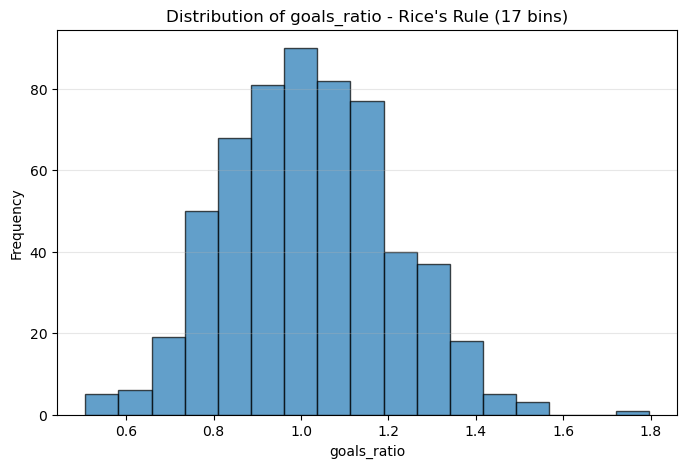

In [107]:
n = len(goals_ratio)


rice_bins = int(np.ceil(2 * n**(1/3)))

print(f"Rice's Rule - number of bins: {rice_bins}")


plt.figure(figsize=(8, 5))
plt.hist(goals_ratio, bins=rice_bins, edgecolor='black', alpha=0.7)
plt.title(f"Distribution of goals_ratio - Rice's Rule ({rice_bins} bins)")
plt.xlabel('goals_ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

### Histogram of the variable using the square root rule

Square Root Rule - number of bins: 25


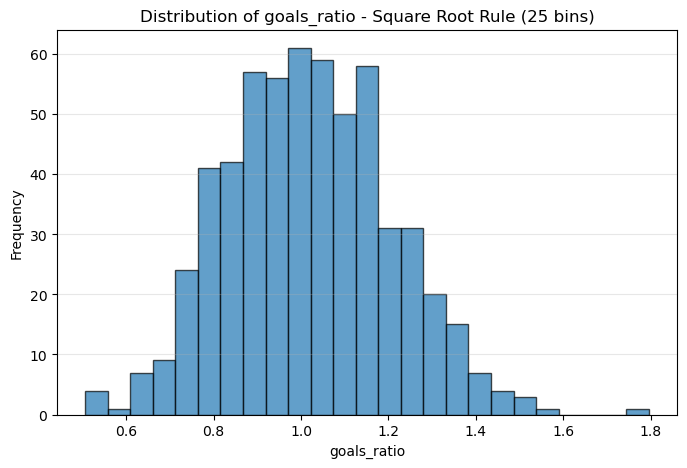

In [108]:
n = len(goals_ratio)


sqrt_bins = int(np.ceil(np.sqrt(n)))

print(f"Square Root Rule - number of bins: {sqrt_bins}")


plt.figure(figsize=(8, 5))
plt.hist(goals_ratio, bins=sqrt_bins, edgecolor='black', alpha=0.7)
plt.title(f"Distribution of goals_ratio - Square Root Rule ({sqrt_bins} bins)")
plt.xlabel('goals_ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

# `victory_percentage`

Similar to the analysis of the variable `goals_ratio`, we will conduct an exploratory analysis of `victory_percentage` by following these steps:  
- Determine the basic descriptive statistics, such as the mean, median, standard deviation, minimum, and maximum.  
- Examine the distribution of the variable by using a histogram to better understand its characteristics.  
- Check if there are any obvious subgroups of teams within the variable under analysis that could be identified based on specific criteria, such as the range of the variable's values.

### Descriptive Statistics

In [109]:
victory_percentage = df['victory_percentage']
victory_percentage_mean = victory_percentage.mean()
victory_percentage_median = victory_percentage.median()
victory_percentage_std = victory_percentage.std()
victory_percentage_min = victory_percentage.min()
victory_percentage_max = victory_percentage.max()
victory_percentage_mod = victory_percentage.mode()
print(f"mean: {victory_percentage_mean}")
print(f"median: {victory_percentage_median}")
print(f"std: {victory_percentage_std}")
print(f"min: {victory_percentage_min}")
print(f"max: {victory_percentage_max}")
print(f"mod {victory_percentage_mod}")

mean: 0.4585189003436426
median: 0.463
std: 0.10223670092318188
min: 0.119
max: 0.756
mod 0    0.5
Name: victory_percentage, dtype: float64


### Distribution

Here we will create the distribution of the variable, but we won't be doing it in two versions. Instead, we will choose a different, arbitrary number of intervals.

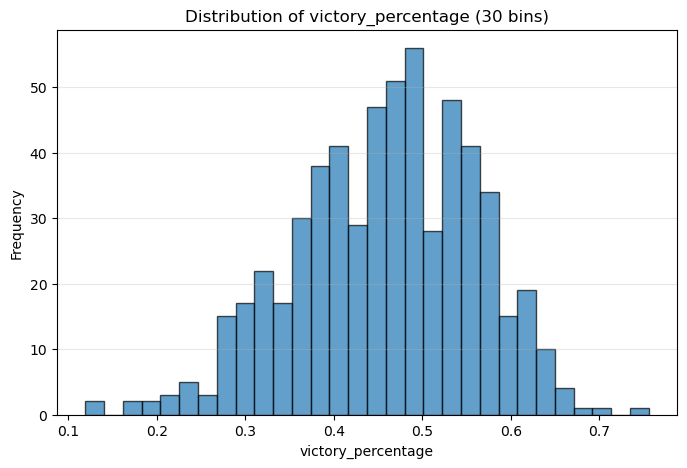

In [110]:
my_bins = 30


plt.figure(figsize=(8, 5))
plt.hist(victory_percentage, bins=my_bins, edgecolor='black', alpha=0.7)
plt.title(f"Distribution of victory_percentage ({my_bins} bins)")
plt.xlabel('victory_percentage')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

# `goals_ratio` vs `victory_percentage`

We have already analyzed `goals_ratio` and `victory_percentage` as two separate variables. Now, our task is to analyze them together to identify potential interdependencies between them.  
  
In this step, we will perform the following exercises:  
- Before starting the analysis, let’s consider whether these variables might be dependent or independent of each other. What kind of relationship can be expected based on their business descriptions?  
- We will create a scatterplot to visually represent the dependencies between these variables.  
- We will determine the relationship between the variables based on the scatterplot.  
- We will analyze the scatterplot to identify any outliers, paying special attention to their common distribution.

## Scatterplot of Variables

Now let's create a scatterplot for the two analyzed variables, `goals_ratio` and `victory_percentage`. After completing this step, let's answer the following questions:  
- What is the relationship between the variables `goals_ratio` and `victory_percentage`?  
- Can any outliers be identified in the plot? If so, what criteria were used to identify them?

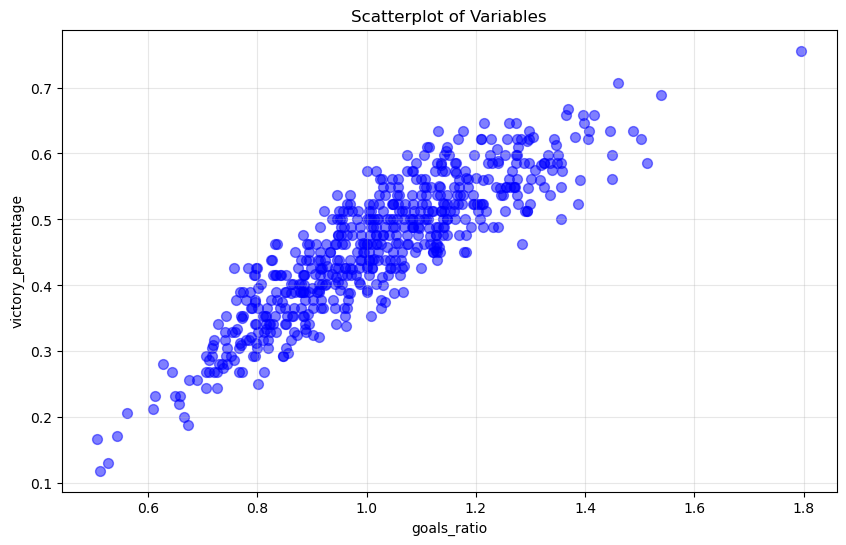

In [111]:
plt.figure(figsize=(10, 6))


df_scatter = pd.DataFrame({
    'goals_ratio': goals_ratio,
    'victory_percentage': victory_percentage
})

# Scatterplot
plt.scatter(x=df['goals_ratio'], y=df['victory_percentage'], c='blue', alpha=0.5, s=50)

plt.xlabel('goals_ratio')
plt.ylabel('victory_percentage')
plt.title('Scatterplot of Variables')
plt.grid(alpha=0.3)
plt.show()

> space for chart analysis notes

If we have identified outlying observations at an earlier stage of analysis, let's now examine these specific cases. We will focus on outliers concerning the variables `goals_ratio` and `victory_percentage` to understand what features distinguish them.

The following steps should be taken for analysis:
1. Identify the specific outlying observations that were detected earlier.
2. Analyze the characteristics of these observations, paying attention to their values for the variables `goals_ratio` and `victory_percentage`.
3. Try to understand what might have caused their outlying nature. Are these instances of anomalies, or could they be the result of natural fluctuations in the data?

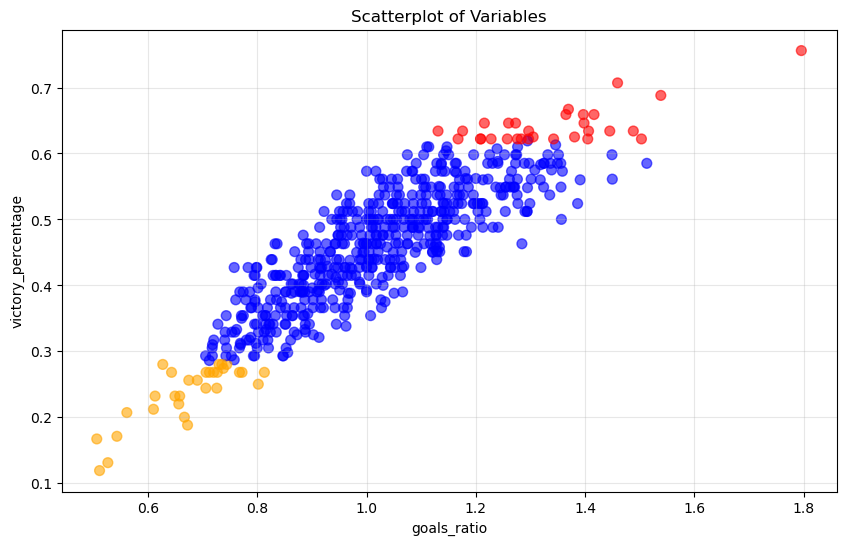

In [112]:
plt.figure(figsize=(10, 6))


df_scatter = pd.DataFrame({
    'goals_ratio': goals_ratio,
    'victory_percentage': victory_percentage
})


percentile_95 = df['victory_percentage'].quantile(0.95)
percentile_5 = df['victory_percentage'].quantile(0.05)

colors = ['red' if x > percentile_95 else 'orange' if x < percentile_5 else 'blue' 
          for x in df['victory_percentage']]

# Scatterplot
plt.scatter(df['goals_ratio'], df['victory_percentage'], c=colors, alpha=0.6, s=50)
plt.xlabel('goals_ratio')
plt.ylabel('victory_percentage')
plt.title('Scatterplot of Variables')
plt.grid(alpha=0.3)
plt.show()


In [113]:
# Calculate the Pearson correlation coefficient between goals ratio and victory percentage.
# A value close to 1 indicates a strong positive relationship — teams that score
# more goals relative to goals conceded tend to win more often.
correlation = df['goals_ratio'].corr(df['victory_percentage'])
print(f"Pearson correlation: {correlation}")

Pearson correlation: 0.881033534891051


# Summary

In this notebook, we conducted a basic exploratory analysis of our dataset. The data was cleaned and then enriched with new variables, which we subjected to further analysis. The final step of this part is to save the processed data to a CSV file.  
  
**Let's save our data frame to the file:** `data/processed/hockey_teams.csv`, using a semicolon (`;`) as the column separator.

Next, in the following phase of our work, we will propose betting odds based on the analyzed historical data and discuss the results of this analysis.

### Writing the frame to the target location

- file name: `data/processed/hockey_teams.csv`,
- column separator: `;`,
- remember to disable index saving.

In [114]:
import os

os.makedirs('data/processed', exist_ok=True)

df.to_csv('data/processed/hockey_teams.csv', sep=';', index=False)

print("saved")

saved
